In [145]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
stock = 'AAPL'
data = yf.download(stock,'2010-01-01','2023-05-14')
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496293,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392177,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434675,447610800


In [150]:
price = data['Close']
price

Date
2010-01-04      7.643214
2010-01-05      7.656429
2010-01-06      7.534643
2010-01-07      7.520714
2010-01-08      7.570714
                 ...    
2023-05-08    173.500000
2023-05-09    171.770004
2023-05-10    173.559998
2023-05-11    173.750000
2023-05-12    172.570007
Name: Close, Length: 3363, dtype: float64

<Axes: xlabel='Date'>

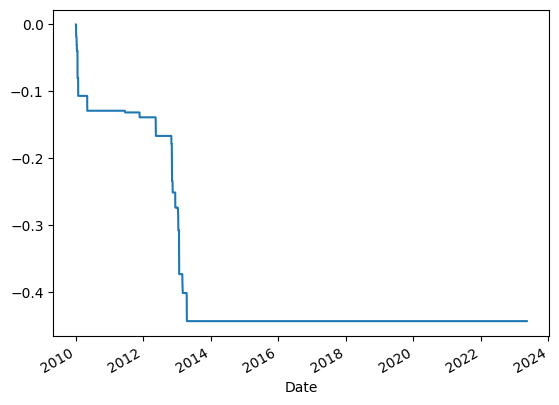

In [151]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()


In [152]:
print(f"Maximum Drawdown is: {mdd[-1]*100} %")

Maximum Drawdown is: -44.37687017144154 %


In [153]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00172893, -0.01590632, ...,  0.01042087,
        0.00109474, -0.00679132])

In [154]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([ 1.        ,  1.00172893,  0.98579511, ..., 22.7077238 ,
       22.73258277, 22.57819842])

In [155]:
print(f"Cumulative return is {cumulative_ret[-1]*100}%")

Cumulative return is 2257.8198415844577%


In [165]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31    0.255580
2012-12-31    0.314000
2013-12-31    0.054212
2014-12-31    0.377241
2015-12-31   -0.046385
2016-12-31    0.100323
2017-12-31    0.461147
2018-12-31   -0.067896
2019-12-31    0.861608
2020-12-31    0.807458
2021-12-31    0.338232
2022-12-31   -0.268289
2023-12-31    0.328177
Freq: A-DEC, Name: Close, dtype: float64

In [166]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.065396
2010-03-31    0.148470
2010-04-30    0.111021
2010-05-31   -0.016125
                ...   
2023-01-31    0.110521
2023-02-28    0.021623
2023-03-31    0.118649
2023-04-30    0.028987
2023-05-31    0.017032
Freq: M, Name: Close, Length: 161, dtype: float64

In [167]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 27.041601109725978%


In [164]:
sharpe_ratio = (avg_yearly_return - 0.05)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 27.88765562863535


In [168]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-05-31   -0.016125
2010-06-30   -0.020827
2010-08-31   -0.055005
2011-03-31   -0.013307
2011-05-31   -0.006569
                ...   
2022-06-30   -0.081430
2022-08-31   -0.032552
2022-09-30   -0.120977
2022-11-30   -0.034629
2022-12-31   -0.122273
Name: Close, Length: 64, dtype: float64

In [170]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.05)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 50.61514176461709
